<a href="https://colab.research.google.com/github/kittidet2541/credit_risk_analysis/blob/main/credit_analysis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# project : Credit risk analysis

# 1. Understanding the Problem & Data Preparation


In [59]:
!pip install --upgrade numpy

In [60]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

df = pd.read_csv('/content/drive/MyDrive/credit_risk_dataset.csv')

#2. EDA and Clean data

In [61]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [62]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [63]:
df.shape  # ขนาดของข้อมูล (จำนวนแถวและจำนวนคอลัมน์)
df.columns  # ชื่อคอลัมน์
df.info()  # ตรวจสอบชนิดของข้อมูลและข้อมูลที่สูญหาย
df.describe()  # ค่าสถิติเบื้องต้น เช่น ค่าเฉลี่ย ค่าเบี่ยงเบนมาตรฐาน


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [64]:
# drop error
df['person_age'].drop(df[df['person_age'] > 80].index, inplace=True)

In [65]:
df.isnull().sum()  # นับจำนวนค่าว่างในแต่ละคอลัมน์


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [66]:
#ค่าเฉลี่ย กับ มัธยฐาน ใกล้เคียงกัน กราฟไม่เบ้ fill ด้วย mean
mean_value_loan_int_rate = df['loan_int_rate'].mean()
mean_value_person_emp_length = df['person_emp_length'].mean()

# ใช้ fillna() เพื่อแทนค่าที่เป็น NaN ด้วยค่าเฉลี่ย
df['loan_int_rate'] = df['loan_int_rate'].fillna(mean_value_loan_int_rate)
df['person_emp_length'] = df['person_emp_length'].fillna(mean_value_person_emp_length)

In [67]:
df.isnull().sum()  # นับจำนวนค่าว่างในแต่ละคอลัมน์


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [68]:
# 1.2 สร้างการแบ่งกลุ่มอายุ (bins) เพื่อดูความแตกต่าง
bins = [20, 30, 40, 50, 60, 70, 80]  # กำหนดช่วงอายุ
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels)

In [69]:
bins = [0, 20000, 40000, 60000, 80000, np.inf]  # np.inf สำหรับค่าที่มากกว่าหรือเท่ากับ 80,000
labels = ['<20k', '20k-40k', '40k-60k', '60k-80k', '>80k']

# จัดกลุ่ม person_income
df['income_group'] = pd.cut(df['person_income'], bins=bins, labels=labels, right=False)

#3.prepocess & visualization

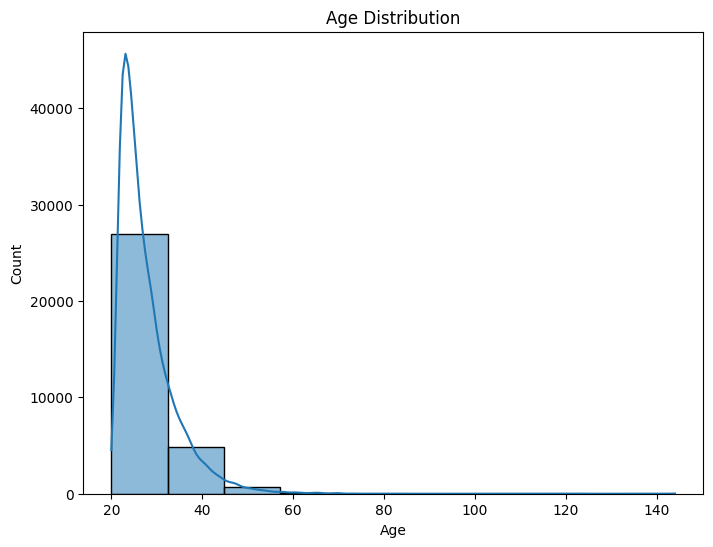

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='person_age', bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# แสดงการกระจายตัวของอายุ

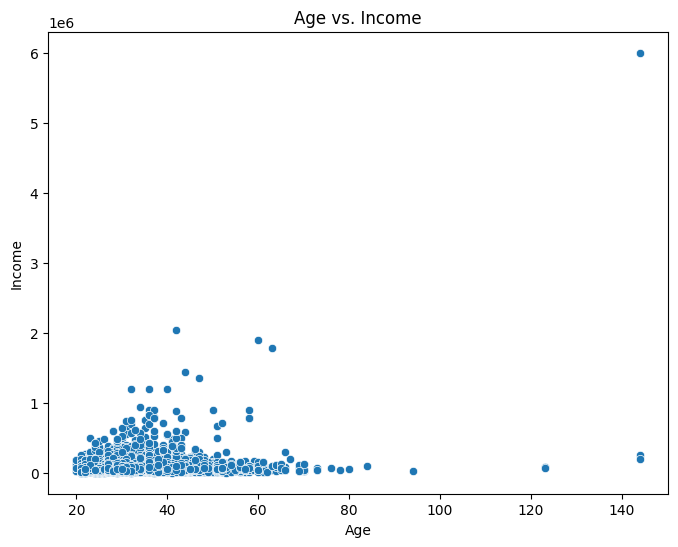

In [71]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='person_age', y='person_income')
plt.title('Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()
# ความสัมพันธ์ระหว่างอายุและรายได้ (Age vs. Income)

Text(0, 0.5, 'Count')

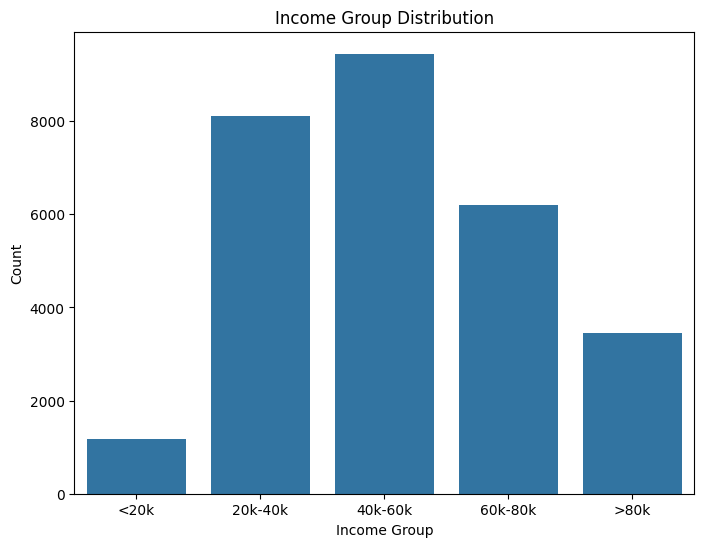

In [72]:
# จัดกลุ่มรายได้
bins = [0, 20000, 40000, 60000, 80000, 100000]
labels = ['<20k', '20k-40k', '40k-60k', '60k-80k', '>80k']
df['income_group'] = pd.cut(df['person_income'], bins=bins, labels=labels)

# สร้างกราฟแท่ง
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='income_group', order=labels)
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')
# plt.show()Income Group Distribution

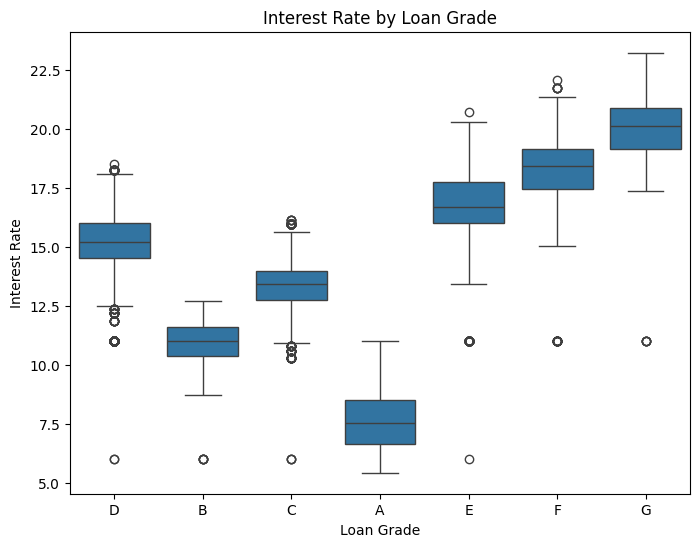

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_grade', y='loan_int_rate')
plt.title('Interest Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.show()


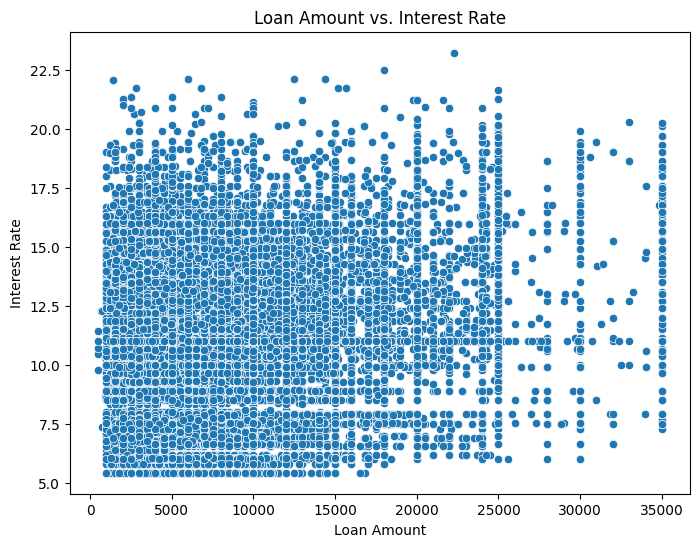

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='loan_amnt', y='loan_int_rate')
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()
# ความสัมพันธ์ระหว่างจำนวนเงินกู้กับอัตราดอกเบี้ย

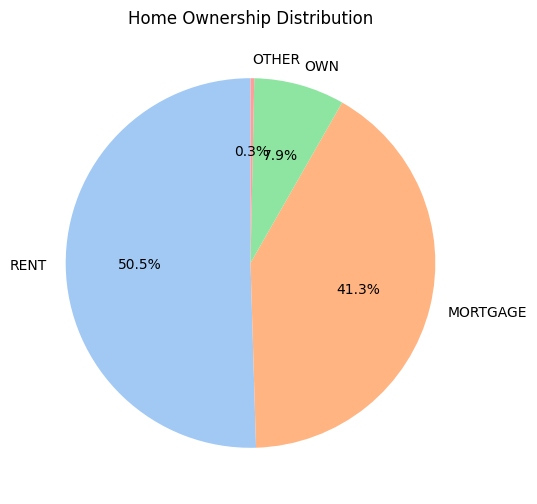

In [75]:
home_ownership_counts = df['person_home_ownership'].value_counts()

plt.figure(figsize=(8, 6))
home_ownership_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Home Ownership Distribution')
plt.ylabel('')  # ซ่อนป้ายแกน y
plt.show()
# สัดส่วนผู้กู้ตามสถานะการเป็นเจ้าของบ้าน

<ipython-input-76-2a3c3f9b43f2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='loan_status', y='person_income', ci=None)


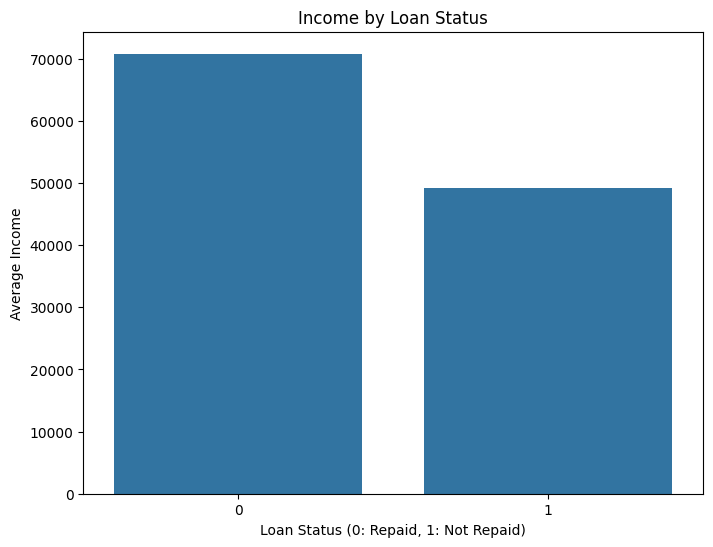

In [76]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='loan_status', y='person_income', ci=None)
plt.title('Income by Loan Status')
plt.xlabel('Loan Status (0: Repaid, 1: Not Repaid)')
plt.ylabel('Average Income')
plt.show()
# การเปรียบเทียบสถานะการชำระเงินกู้ (Loan Status) กับรายได้ (Income)

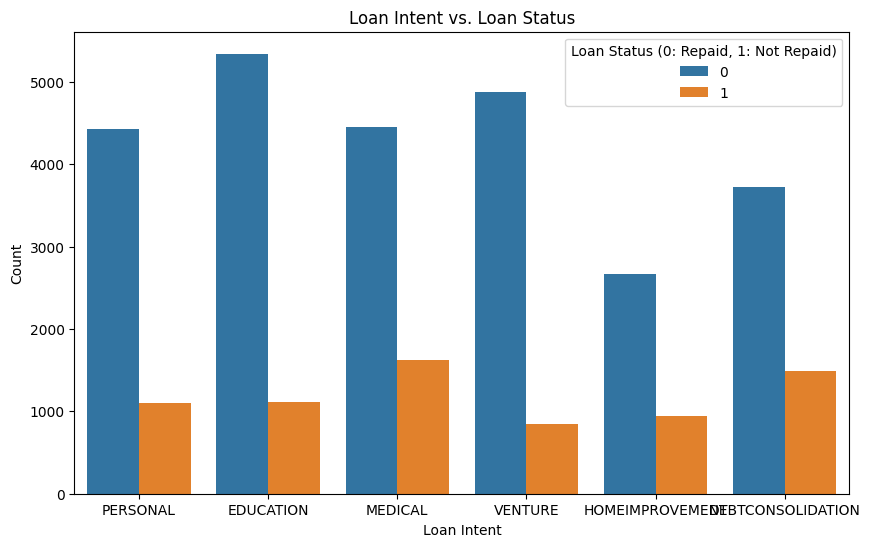

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_intent', hue='loan_status')
plt.title('Loan Intent vs. Loan Status')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.legend(title='Loan Status (0: Repaid, 1: Not Repaid)')
plt.show()
# ความสัมพันธ์ระหว่างวัตถุประสงค์ของการกู้ยืมกับสถานะการชำระ (Loan Intent vs. Loan Status)

ตั้งคำถาม
1.คนประเภทไหนขอสินเชื่อมากที่สุด และ ผิดนัดชำระหนี้มากที่สุด?


2.ช่วงอายุไหนมีสินเขื่อมากที่สุด และ ปรเภทไหน?

3.กลุ่มช่วงอายุไหนมีหนี้มากที่สุด เเละ ผิดการชำระหนี้มากที่สุด

In [78]:
group_count_home_ownership = df.groupby(['person_home_ownership', 'loan_status']).size().reset_index(name='count')

In [79]:
group_count_home_ownership

,person_home_ownership,loan_status,count
0,MORTGAGE,0,11754
1,MORTGAGE,1,1690
2,OTHER,0,74
3,OTHER,1,33
4,OWN,0,2391
5,OWN,1,193
6,RENT,0,11254
7,RENT,1,5192


<ipython-input-80-6426806d5c9e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(group_count_home_ownership, x='count', y='person_home_ownership', inner='stick', palette='Dark2')


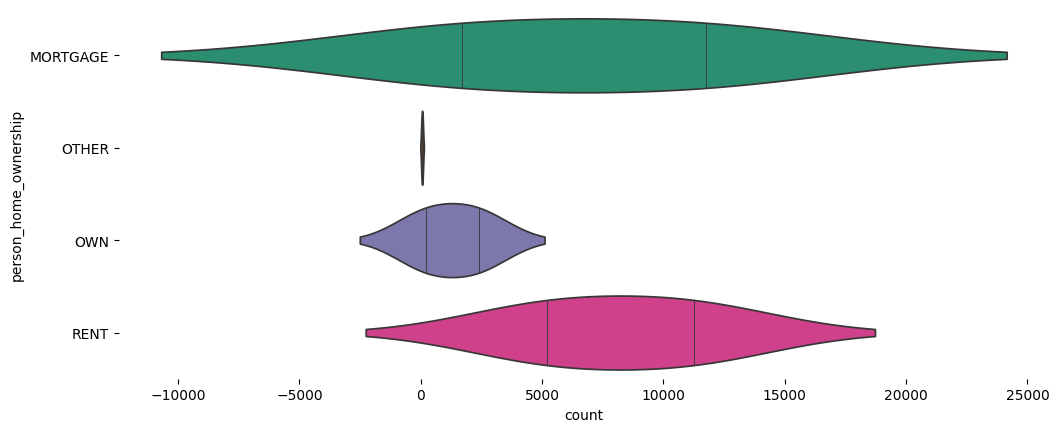

In [80]:
# @title person_home_ownership vs count

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(group_count_home_ownership['person_home_ownership'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(group_count_home_ownership, x='count', y='person_home_ownership', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

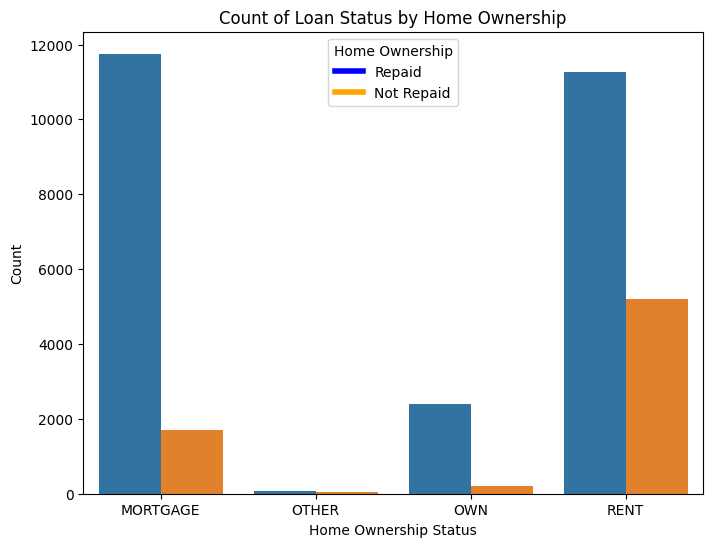

In [81]:
# แสดงผลด้วย Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=group_count_home_ownership, x='person_home_ownership', y='count', hue='loan_status')
plt.title('Count of Loan Status by Home Ownership')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
# plt.legend(title='Loan Status', labels=['Not Repaid', 'Repaid'])
plt.legend(title='Home Ownership',  labels=['Repaid', 'Not Repaid'],
           handles=[
               plt.Line2D([0], [0], color='blue', lw=4),    # Own     # Mortgage
               plt.Line2D([0], [0], color='orange', lw=4)      # Other
           ])

plt.show()

2.ช่วงอายุไหนมีสินเขื่อมากที่สุด และ ปรเภทไหน?

In [82]:
group_count_age_group = df.groupby(['age_group', 'loan_status']).size().reset_index(name='count')

<ipython-input-82-49fadbee8fcc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_count_age_group = df.groupby(['age_group', 'loan_status']).size().reset_index(name='count')


In [83]:
group_count_age_group

,age_group,loan_status,count
0,20-30,0,19298
1,20-30,1,5511
2,31-40,0,4987
3,31-40,1,1276
4,41-50,0,960
5,41-50,1,246
6,51-60,0,162
7,51-60,1,56
8,61-70,0,40
9,61-70,1,17


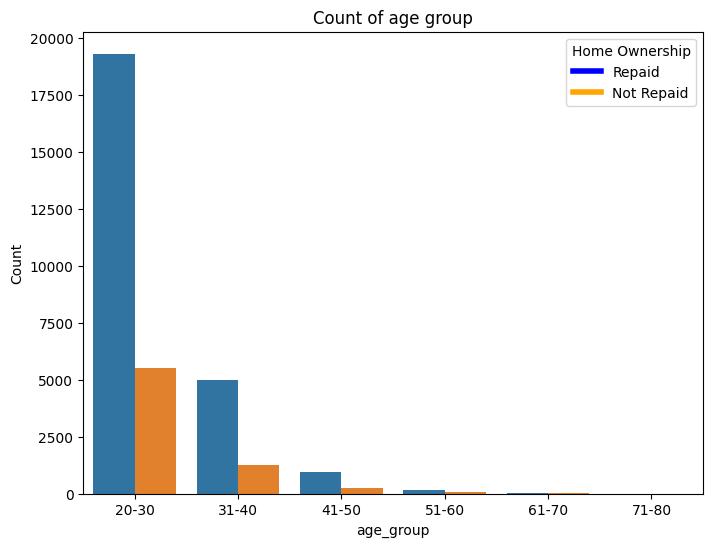

In [84]:
# แสดงผลด้วย Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=group_count_age_group, x='age_group', y='count', hue='loan_status')
plt.title('Count of age group')
plt.xlabel('age_group')
plt.ylabel('Count')
plt.legend(title='Home Ownership',  labels=['Repaid', 'Not Repaid'],
           handles=[
               plt.Line2D([0], [0], color='blue', lw=4),    # Own     # Mortgage
               plt.Line2D([0], [0], color='orange', lw=4)      # Other
           ])
plt.show()

กลุ่มที่มีสินเชื่อเยอะสุดก็คือ 20-30 ปี

และประเภทไหน?

In [85]:
group_count_age_group_ownership = df.groupby(['age_group', 'person_home_ownership']).size().reset_index(name='count')

<ipython-input-85-ca1d28d03e02>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_count_age_group_ownership = df.groupby(['age_group', 'person_home_ownership']).size().reset_index(name='count')


In [86]:
group_count_age_group_ownership_filter = group_count_age_group_ownership[group_count_age_group_ownership['age_group'] == '20-30']

In [87]:
group_count_age_group_ownership_filter

,age_group,person_home_ownership,count
0,20-30,MORTGAGE,10088
1,20-30,OTHER,89
2,20-30,OWN,1956
3,20-30,RENT,12676


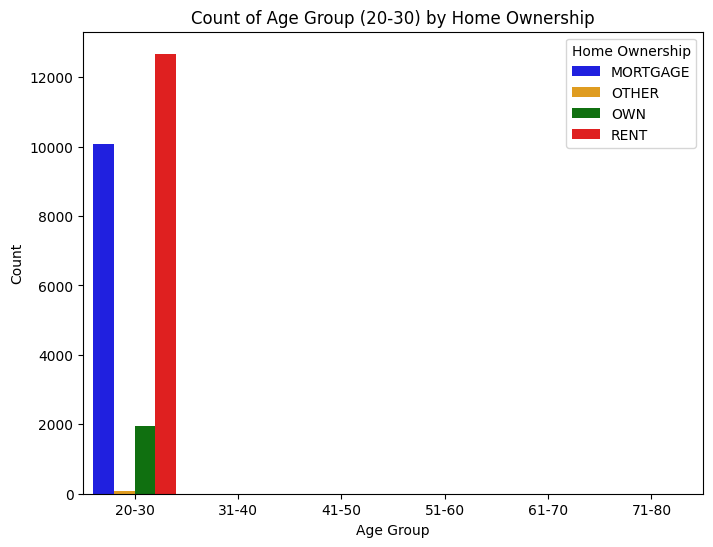

In [88]:
# แสดงผลด้วย Seaborn
palette= {
    'OWN': 'green',
    'MORTGAGE': 'blue',
    'RENT': 'red',
    'OTHER': 'orange'
}
plt.figure(figsize=(8, 6))
sns.barplot(data=group_count_age_group_ownership_filter, x='age_group', y='count', hue='person_home_ownership', palette=palette)
plt.title('Count of Age Group (20-30) by Home Ownership')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Home Ownership')
plt.show()

3.กลุ่มช่วงอายุไหนมีหนี้มากที่สุด เเละ ผิดการชำระหนี้มากที่สุด

In [89]:
group_count_income_group = df.groupby(['income_group', 'loan_status']).size().reset_index(name='count')

<ipython-input-89-f99aa0493451>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_count_income_group = df.groupby(['income_group', 'loan_status']).size().reset_index(name='count')


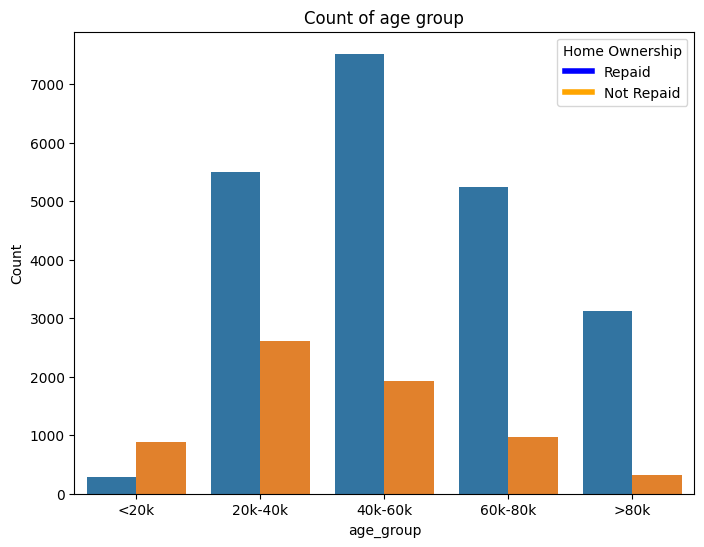

In [90]:
# แสดงผลด้วย Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=group_count_income_group, x='income_group', y='count', hue='loan_status')
plt.title('Count of age group')
plt.xlabel('age_group')
plt.ylabel('Count')
plt.legend(title='Home Ownership',  labels=['Repaid', 'Not Repaid'],
           handles=[
               plt.Line2D([0], [0], color='blue', lw=4),    # Own     # Mortgage
               plt.Line2D([0], [0], color='orange', lw=4)      # Other
           ])
plt.show()

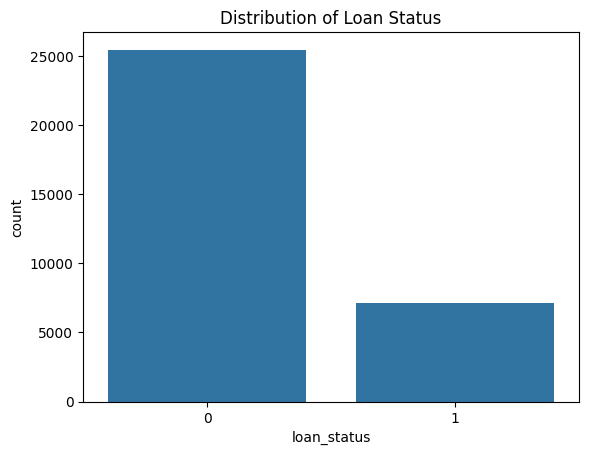

In [91]:
# ดูการกระจายของ loan_status
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.show()

จะเห็นได้ว่า ข้อมูล loan_status มีการ imbalance มาก

In [92]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,20-30,40k-60k
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-30,<20k
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-30,<20k
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-30,60k-80k
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-30,40k-60k


In [93]:
# แปลงข้อมูลหมวดหมู่เป็นตัวเลขโดยใช้ Label Encoding
le = LabelEncoder()
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df['loan_grade'] = le.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'])

df_encoded = df.copy().drop(columns=['age_group', 'income_group'])


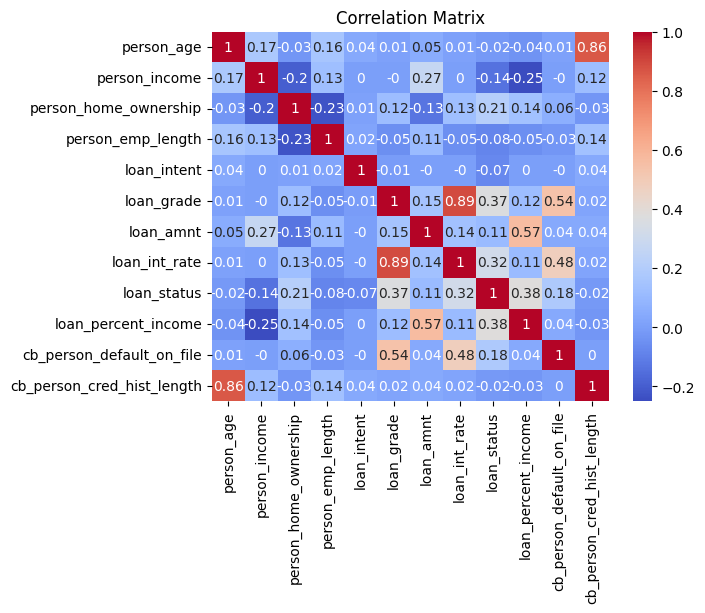

In [94]:
# สร้าง heatmap ความสัมพันธ์ระหว่างตัวแปรอีกครั้ง
sns.heatmap(df_encoded.corr().round(2), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [95]:
# 1. สร้าง DataFrame ของความสัมพันธ์
correlation_matrix = df_encoded.corr().round(2)

# แสดง DataFrame ของความสัมพันธ์
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,1.00,0.17,-0.03,0.16,0.04,0.01,0.05,0.01,-0.02,-0.04,0.01,0.86
person_income,0.17,1.00,-0.20,0.13,0.00,-0.00,0.27,0.00,-0.14,-0.25,-0.00,0.12
person_home_ownership,-0.03,-0.20,1.00,-0.23,0.01,0.12,-0.13,0.13,0.21,0.14,0.06,-0.03
person_emp_length,0.16,0.13,-0.23,1.00,0.02,-0.05,0.11,-0.05,-0.08,-0.05,-0.03,0.14
loan_intent,0.04,0.00,0.01,0.02,1.00,-0.01,-0.00,-0.00,-0.07,0.00,-0.00,0.04
loan_grade,0.01,-0.00,0.12,-0.05,-0.01,1.00,0.15,0.89,0.37,0.12,0.54,0.02
loan_amnt,0.05,0.27,-0.13,0.11,-0.00,0.15,1.00,0.14,0.11,0.57,0.04,0.04
loan_int_rate,0.01,0.00,0.13,-0.05,-0.00,0.89,0.14,1.00,0.32,0.11,0.48,0.02
loan_status,-0.02,-0.14,0.21,-0.08,-0.07,0.37,0.11,0.32,1.00,0.38,0.18,-0.02
loan_percent_income,-0.04,-0.25,0.14,-0.05,0.00,0.12,0.57,0.11,0.38,1.00,0.04,-0.03


In [96]:
import pandas as pd

# สมมติว่า df คือ DataFrame ของคุณ
# df = pd.read_csv('your_data.csv')  # โหลดข้อมูล (ถ้ายังไม่ได้โหลด)

# 1. สร้างฟีเจอร์ใหม่ที่มีความสัมพันธ์กับ loan_status

# 1.1 อัตราส่วนของ loan amount ต่อ person income
df_encoded['loan_to_income_ratio'] = df_encoded['loan_amnt'] / df_encoded['person_income']

# 1.2 สร้างการแบ่งกลุ่มอายุ (bins) เพื่อดูความแตกต่าง
bins = [20, 30, 40, 50, 60, 70, 80]  # กำหนดช่วงอายุ
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df_encoded['age_group'] = pd.cut(df_encoded['person_age'], bins=bins, labels=labels)

# 1.3 การสร้างฟีเจอร์ใหม่จาก loan_grade และ loan_int_rate
df_encoded['grade_interest_interaction'] = df_encoded['loan_grade'] * df_encoded['loan_int_rate']

# 1.4 สร้างฟีเจอร์ที่แสดงประวัติเครดิตและการผิดนัด
df_encoded['credit_default'] = df_encoded['cb_person_default_on_file'] * df_encoded['cb_person_cred_hist_length']

# 1.5 สร้างฟีเจอร์การทำงาน (employment) เพื่อประเมินความมั่นคงทางการเงิน
df_encoded['is_long_term_employment'] = df_encoded['person_emp_length'].apply(lambda x: 1 if x >= 5 else 0)

# 2. สร้าง DataFrame สำหรับ X (ฟีเจอร์) และ y (สถานะการชำระหนี้)
features = [
    "loan_grade",
    "loan_int_rate",
    "loan_amnt",
    "loan_to_income_ratio",
    "credit_default",
    "is_long_term_employment",
    "person_income",
]

X = df_encoded[features]

y = df_encoded['loan_status']  # ตัวแปรเป้าหมาย

# แสดง DataFrame ใหม่ที่สร้างฟีเจอร์เพิ่ม
df_encoded.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_income_ratio,age_group,grade_interest_interaction,credit_default,is_long_term_employment
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3,0.593220,20-30,48.06,3,1
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2,0.104167,20-30,11.14,0,1
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3,0.572917,20-30,25.74,0,0
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2,0.534351,20-30,30.46,0,0
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4,0.643382,20-30,28.54,4,1


## 4. Feature Engineering

ต่อไปจะทำ Feature engineering จะใช้ 3 วิธีเทียบความเเม่นยำของโฒเดล

In [97]:
# Feature Engineering Cor check feature to target
x = ['person_income','person_home_ownership', 'loan_grade', 'loan_int_rate', 'loan_percent_income']
X =df_encoded[x]
y = df_encoded['loan_status']

In [98]:
def feature_engineering_feature_to_target(df_encoded):
  x = ['person_income',
       'person_home_ownership',
       'loan_grade',
       'loan_int_rate',
       'loan_percent_income'
]
  X =df_encoded[x]
  y = df_encoded['loan_status']
  return X,y


def feature_engineering_add_new_feature(df_encoded):
    features = ["loan_grade",
    "loan_int_rate",
    "loan_amnt",
    "loan_to_income_ratio",
    "credit_default",
    "is_long_term_employment",
    "person_income"]

    X = df_encoded[features]
    y = df_encoded['loan_status']
    return X,y




#5.Model Building

feature to feature old data

In [99]:
# feature_engineering_feature_to_target(df)

In [100]:
# แบ่งข้อมูลเป็น training และ testing set
x = ['person_income',
       'person_home_ownership',
       'loan_grade',
       'loan_int_rate',
       'loan_percent_income'
]
X =df_encoded[x]
y = df_encoded['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ทำการสเกลข้อมูลด้วย StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# สร้างและฝึกสอนโมเดล Logistic Regression
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

# ทำนายผลลัพธ์จากชุดทดสอบ
y_pred = log_reg.predict(X_test)


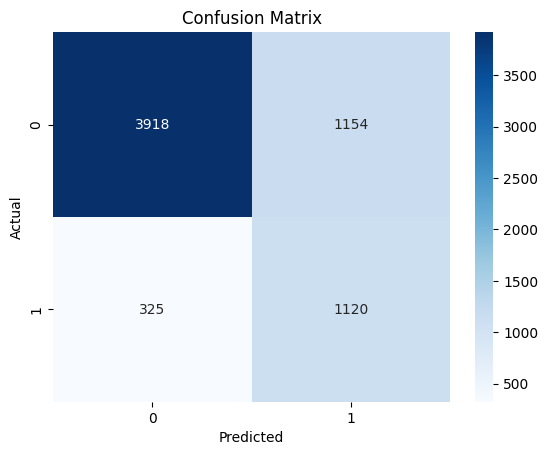

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      5072
           1       0.49      0.78      0.60      1445

    accuracy                           0.77      6517
   macro avg       0.71      0.77      0.72      6517
weighted avg       0.83      0.77      0.79      6517

ROC AUC Score: 0.8373506625697226


In [101]:
# แสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# แสดงรายงานการจัดประเภท (Classification Report)
print(classification_report(y_test, y_pred))

# คำนวณ ROC AUC Score
roc_score = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_score}")

In [102]:
# pip install tpot


In [103]:
# from tpot import TPOTClassifier
# from sklearn.model_selection import train_test_split

# # แบ่งข้อมูล
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # สร้างโมเดล TPOT
# tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42)

# # ฝึกโมเดล
# tpot.fit(X_train, y_train)

# # ประเมินโมเดล
# print(tpot.score(X_test, y_test))

# # แสดงโมเดลที่ดีที่สุด
# tpot.export('best_model.py')


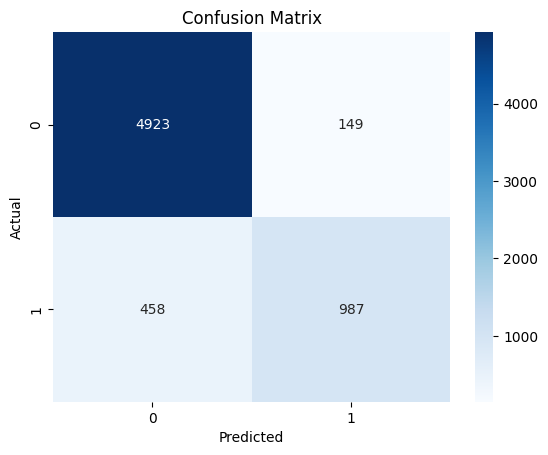

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5072
           1       0.87      0.68      0.76      1445

    accuracy                           0.91      6517
   macro avg       0.89      0.83      0.85      6517
weighted avg       0.90      0.91      0.90      6517

ROC AUC Score: 0.9309470953903922


In [104]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# แยกข้อมูลออกเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล XGBoost พร้อมปรับค่า scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model = xgb.XGBClassifier( random_state=42)

# เทรนโมเดล
model.fit(X_train, y_train)

# ทำนายค่าจากข้อมูลทดสอบ
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# xgb.plot_importance(model, importance_type='weight')
# plt.title('Feature Importance')
# plt.show()

# ประเมินผลลัพธ์
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_probs)}")


In [109]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# แบ่งข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล TPOT
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42)

# ฝึกโมเดล
tpot.fit(X_train, y_train)

# ประเมินโมเดล
print(tpot.score(X_test, y_test))

# แสดงโมเดลที่ดีที่สุด
tpot.export('best_model.py')


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.90626914324673

Generation 2 - Current best internal CV score: 0.9072282323296192

Generation 3 - Current best internal CV score: 0.9072282323296192

Generation 4 - Current best internal CV score: 0.9072282323296192

Generation 5 - Current best internal CV score: 0.9072282323296192

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=2, max_features=0.8500000000000001, min_samples_leaf=11, min_samples_split=16, n_estimators=100, subsample=1.0)
0.9059383151756943


In [105]:
# สร้างโมเดล Random Forest
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = RandomForestClassifier(random_state=42)

# ใช้ Cross-Validation เพื่อประเมินโมเดล
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

# ฝึกโมเดล
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# ประเมินผลลัพธ์
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Cross-Validation Scores: [0.90849799 0.89737195 0.9065797  0.90101669 0.89735226]
Mean CV Score: 0.9021637196341457
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5072
           1       0.84      0.70      0.76      1445

    accuracy                           0.90      6517
   macro avg       0.88      0.83      0.85      6517
weighted avg       0.90      0.90      0.90      6517

ROC AUC Score: 0.8312475440166789


In [110]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# สร้าง pipeline ที่ดีที่สุด
pipeline = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        learning_rate=0.5,
        max_depth=2,
        max_features=0.85,
        min_samples_leaf=11,
        min_samples_split=16,
        n_estimators=100,
        subsample=1.0
    )
)

# ฝึกโมเดล
pipeline.fit(X_train, y_train)

# คาดการณ์
results = pipeline.predict(X_test)

# ประเมินผล
accuracy = pipeline.score(X_test, y_test)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, results))
print("ROC AUC Score:", roc_auc_score(y_test, results))

Accuracy: 0.9059383151756943
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5072
           1       0.88      0.67      0.76      1445

    accuracy                           0.91      6517
   macro avg       0.89      0.82      0.85      6517
weighted avg       0.90      0.91      0.90      6517

ROC AUC Score: 0.8212937165031163


In [108]:
# สร้างโมเดล Random Forest
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(bootstrap=True, criterion='gini', max_features=0.95, min_samples_leaf=6, min_samples_split=19, n_estimators=100)
)

# ใช้ Cross-Validation เพื่อประเมินโมเดล
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

# ฝึกโมเดล
pipeline.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# ประเมินผลลัพธ์
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Cross-Validation Scores: [0.91022444 0.90005755 0.9044696  0.89813927 0.90195702]
Mean CV Score: 0.9029695744109822
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5072
           1       0.84      0.70      0.76      1445

    accuracy                           0.90      6517
   macro avg       0.88      0.83      0.85      6517
weighted avg       0.90      0.90      0.90      6517

ROC AUC Score: 0.8312475440166789


In [ ]:
# prompt: check python version

import sys
print(sys.version)

In [ ]:
# แบ่งข้อมูลเป็น training และ testing set
features = ["loan_grade",
    "loan_int_rate",
    "loan_amnt",
    "loan_to_income_ratio",
    "credit_default",
    "is_long_term_employment",
    "person_income"]

X = df_encoded[features]
y = df_encoded['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ทำการสเกลข้อมูลด้วย StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# สร้างและฝึกสอนโมเดล Logistic Regression
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

# ทำนายผลลัพธ์จากชุดทดสอบ
y_pred = log_reg.predict(X_test)


In [ ]:
# แสดง Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# แสดงรายงานการจัดประเภท (Classification Report)
print(classification_report(y_test, y_pred))

# คำนวณ ROC AUC Score
roc_score = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_score}")

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# แยกข้อมูลออกเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล XGBoost พร้อมปรับค่า scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# เทรนโมเดล
model.fit(X_train, y_train)

# ทำนายค่าจากข้อมูลทดสอบ
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# ประเมินผลลัพธ์
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_probs)}")


In [ ]:
# สร้างโมเดล Random Forest
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = RandomForestClassifier(random_state=42)

# ใช้ Cross-Validation เพื่อประเมินโมเดล
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

# ฝึกโมเดล
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# ประเมินผลลัพธ์
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
